# 1.时间序列模分析概述


时间序列是按照时间次序排列的随机变量序列，如：每日股票收盘价，每隔15min的风力发电量、每年的GDP等等。 从商业经济、管理或者工程科技，时间序列分析都占据着十分重要的作用，应用范围十分广泛。 下面，我们先通过几个案例学习时间序列分析的几个目标：

**（1）描述：** （以下例子参考于何书元老师的《应用时间序列分析》第一章 例1.2）

下面一份数据列出了某城市1991年至1996年中每个季度的民用煤消耗量（单位：吨），我们需要对民用煤消耗量进行合理的描述性分析。

In [27]:
# 引入相关工具包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 6)
%matplotlib inline
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")
# plt.rcParams['font.sans-serif'] = ["SimHei"]  # 绘图显示中文
# plt.rcParams["axes.unicode_minus"] = False

In [28]:
# 读取数据并进行初步展示
time_index_list = ['1991Q1','1991Q2','1991Q3','1991Q4',
                   '1992Q1','1992Q2','1992Q3','1992Q4',
                   '1993Q1','1993Q2','1993Q3','1993Q4',
                   '1994Q1','1994Q2','1994Q3','1994Q4',
                   '1995Q1','1995Q2','1995Q3','1995Q4',
                   '1996Q1','1996Q2','1996Q3','1996Q4']
QTY_list = [6878.4,5343.7,4847.9,6421.9,
            6815.4,5532.6,4745.6,6406.2,
            6634.4,5658.5,4674.8,6645.5,
            7130.2,5532.6,4989.6,6642.3,
            7413.5,5863.1,4997.4,6776.1,
            7476.5,5965.5,5202.1,6894.1]
data = pd.DataFrame({'Year':time_index_list,
                     'QTY':QTY_list})
data.head()

,Year,QTY
0,1991Q1,6878.4
1,1991Q2,5343.7
2,1991Q3,4847.9
3,1991Q4,6421.9
4,1992Q1,6815.4


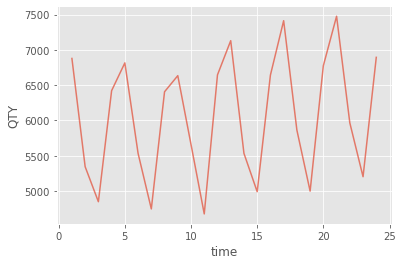

In [29]:
# 对民用煤消耗量做可视化展示：
plt.plot(np.arange(24)+1, data['QTY'],alpha=0.7)
plt.xlabel("time")
plt.ylabel("QTY")
plt.show()

从图中可以清晰看到，数据有强烈的周期信息，周期是4且民用煤消耗量呈现略微逐年增加的趋势。为了验证时间序列是否具有趋势信息和周期信息，我们需要对时间序列进行分解。在分解之前，我们先来学习时间序列的几个重要术语：

**时间序列**：按照时间次序排列的随机变量序列$X_1,X_2,...$称为时间序列。因此，时间序列中每一个时刻都是一个随机变量，而我们观察到的数值就是时间序列在某个时刻的观测值，用$x_1,x_2,...,x_N$表示。如：

|  序号    |  $\{X_t\}$        | $\{x_t\}$    |QTY     |
|  ----    | ----              |----          |  ----  |
| 0        | $X_0 $~ N(10,0.1) | $x_0$        | 11     |
| 1        | $X_1 $~ N(10,0.1) | $x_1$        | 9      |
| 2        | $X_2 $~ N(10,0.1) | $x_2$        | 10     |
| 3        | $X_3 $~ N(10,0.1) | $x_3$        | 12     |
| 4        | $X_4 $~ N(10,0.1) | $x_4$        | 11     |
| 5        | $X_5 $~ N(10,0.1) | $x_5$        | 9      |


**时间序列的分解**：大量的时间序列的观测样本都表现出趋势性、季节性和随机性，因此可以把时间序列分解为三个部分的叠加：
$$
X_t = T_t + S_t + R_t, t = 1,2,......   
$$

其中，$\{T_t\}$是趋势项（Trend），$\{S_t\}$是季节项（Seasonal），$\{R_t\}$是随机项（Random），也就是说时间序列$\{X_t\}$是这三项的叠加。有的同学可能在其他教材上看到时间序列还可以分解为趋势项、季节项、随机项还有**周期项**，实际上周期项往往是非固定频率的波动而季节项是固定频率的波动，二者有着显著的差别。再者，趋势可以被宽泛地定义为“平均水平上的长时期变化", 这个定义实际上是不准确的，举个例子：温度变化假如是50年一个周期，但是现阶段只有10年的温度数据，那么它可能呈现一种趋势，但是如果我们有几百年的数据，那么周期性比较明显了，因此20年数据中体现的趋势只不过是较大的周期中的一部分，最好的方法就是把趋势性和周期性结合起来考虑，而 $T_{t}$正是综合考虑了趋势性与周期性信息。

*下面给出一段时间序列分解的数学推导，感兴趣的同学可以仔细琢磨，不感兴趣的同学可以跳过此段！*

假如时间序列的季节项$\{S_t\}$只有一个周期s，那么$S(t+s)=S(t), \quad t=1,2,...$，于是季节项$\{S_t\}$在任何一个周期内的平均数是常数：$\frac{1}{s} \sum_{j=1}^{s} S(t+j)=c$。这个结论在周期函数中显而易见，如：$y = sin(x)$，周期是$2\pi$，那么在任意$2\pi$周期内$y = sin(x)$的平均值为0。可以使用python代码模拟下这个结论：

周期内的平均值为： 0.007272915427893426


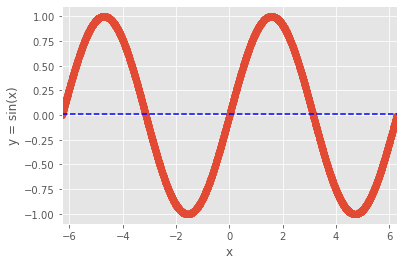

In [30]:
# 使用python模拟周期函数在周期内的平均值为常数c
x = np.random.uniform(-2*np.pi,2*np.pi,10000)
y = np.sin(x)
y_mean = np.mean(y)
print("周期内的平均值为：",y_mean)
plt.scatter(x,y)
plt.axhline(y=y_mean,c="blue",ls='--')
plt.xlim(-2*np.pi,2*np.pi)
plt.xlabel("x")
plt.ylabel("y = sin(x)")
plt.show()

因此，我们可以让时间序列分解式$X_{t}=T_{t}+S_{t}+R_{t}, \quad t=1,2, \cdots$ 中的趋势项的均值化为0：$X_{t}=\left(T_{t}+c\right)+\left(S_{t}-c\right)+R_{t}, \quad t=1,2, \cdots$。同时，我们也希望随机项的均值等于0，即：$\mathrm{E} R_{t}=0, \quad t=1,2, \cdots $.

现在，我们使用几个案例介绍常用的分解时间序列的方法：

- **方法1：分段趋势法：**

分段趋势法把趋势项定义成一段时间内的趋势，如民用煤消耗量数据中，从年平均的角度看，数据有缓慢逐年上升趋势，最简单的方法就是把趋势项$\{T_t\}$ 定义为年平均，即：

$$
\begin{aligned}
&\hat{T}_{1}=\cdots=\hat{T}_{4} = \frac{6878.4+5343.7+4847.9+6421.9}{4} = 5873.0 \\
&\hat{T}_{5}=\cdots=\hat{T}_{8} = \frac{6815.4+5532.6+4745.6+6406.2}{4} = 5875.0 \\
&\cdots \cdots \cdots \cdots \cdots \\
&\hat{T}_{21}=\cdots=\hat{T}_{24} = \frac{7476.5+5965.5+5202.1+6894.4}{4} = 6384.5
\end{aligned}
$$

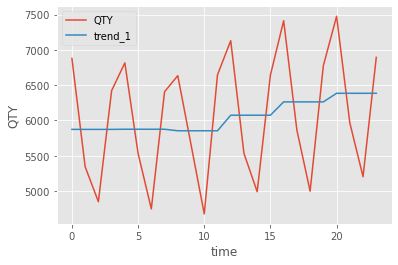

In [31]:
# 分段趋势法：分解趋势信息
time_index_list = ['1991Q1','1991Q2','1991Q3','1991Q4',
                   '1992Q1','1992Q2','1992Q3','1992Q4',
                   '1993Q1','1993Q2','1993Q3','1993Q4',
                   '1994Q1','1994Q2','1994Q3','1994Q4',
                   '1995Q1','1995Q2','1995Q3','1995Q4',
                   '1996Q1','1996Q2','1996Q3','1996Q4']
QTY_list = [6878.4,5343.7,4847.9,6421.9,
            6815.4,5532.6,4745.6,6406.2,
            6634.4,5658.5,4674.8,6645.5,
            7130.2,5532.6,4989.6,6642.3,
            7413.5,5863.1,4997.4,6776.1,
            7476.5,5965.5,5202.1,6894.1]
data = pd.DataFrame({'Year':time_index_list,
                     'QTY':QTY_list})
t_1 = [5873.0,5875.0,5853.3,6073.7,6262.6,6384.5] # 分段趋势
t_1 = [val for val in t_1 for _ in range(4)]   # 让一年内每个季度的趋势项都是该年的均值
data['trend_1'] = t_1
data[['QTY','trend_1']].plot()
plt.xlabel("time")
plt.ylabel("QTY")
plt.show()

由于时间序列分解为三个部分的叠加：
$$
X_t = T_t + S_t + R_t, t = 1,2,......   
$$

其中，$\{T_t\}$是趋势项（Trend），$\{S_t\}$是季节项（Seasonal），$\{R_t\}$是随机项（Random）。因此，时间序列的原始序列减去趋势项的估计值$\{\hat{T}_t \}$得到的数据只包含季节项和随机项。可以使用第k季度的均值作为季节想$S(k),\quad 1\leq k \leq 4$，因此：

$$
\begin{array}{ll}
\hat{S}(1) = \frac{6878.4 + 6815.4 + 6634.4 + 7130.2 + 7413.5 + 7476.5}{6} = 1004.4\\ 
\hat{S}(2) = \frac{5343.7 + 5532.6 + 5658.5 + 5532.6 + 5863.1 + 5965.5}{6} = -404.3 \\
\hat{S}(3) = \frac{4847.9 + 4745.6 + 4674.8 + 4989.6 + 4997.4 + 5202.1}{6} = -1144.1\\ 
\hat{S}(4) = \frac{6421.9 + 6406.2 + 6645.5 + 6642.3 + 6776.1 + 6894.1}{6} = 544.0 
\end{array}
$$

最后，使用原始时间序列减趋势项减季节项等于随机项的估计值，即：
$$
\hat{R}_{t}=x_{t}-\hat{T}_{t}-\hat{S}_{t}, \quad 1 \leqslant t \leqslant 24 .
$$

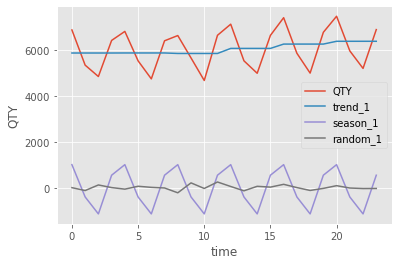

In [32]:
# 分段趋势法：分解季节项和随机项
season_1 = [1004.4,-404.3,-1144.1,544.0]
season_1 = season_1 * 6   # 6年
data['season_1'] = season_1
data['random_1'] = data['QTY'] - data['trend_1'] - data['season_1']
data[['QTY','trend_1','season_1','random_1']].plot()
plt.xlabel("time")
plt.ylabel("QTY")
plt.show()

最后，总结一下分解图的结论：从时间序列分析图中的趋势项可以看出，某城市1991年至1996年中每个季度的民用煤消耗量呈逐年递增的趋势；从时间序列分析图中的季节项可以看出，某城市1991年至1996年中每个季度的民用煤消耗量在每个季度均有波动，波动范围大约在-1000 ~ 1000，相对趋势项来说影响较小（大约为0 ~ 1/6）。

- **方法2：回归直线趋势法**

在分段趋势法中，我们把趋势项估计为每一年的平均数，6年的数据分成了6段，但是这个分析粒度显然太粗糙了，但是我们还是从粗糙的分段趋势法中找到了民用煤消耗量呈逐年递增的趋势。因此，我们可以使用回归直线代替分段趋势来代表趋势项，即时间序列$x_t$满足以下一元回归模型：

$$
x_{t}=\beta_0+\beta_1 t+\varepsilon_{t}, \quad t=1,2, \cdots
$$

再者，除了趋势项以外的季节项与随机项的操作不变！

*下面是关于一元线性回归模型的参数估计推导，感兴趣的同学们可以仔细阅读，不感兴趣的同学们可以跳过此段！*


趋势项的回归曲线为：y_hat = 5789.549637681161 + 21.795695652173926 * t


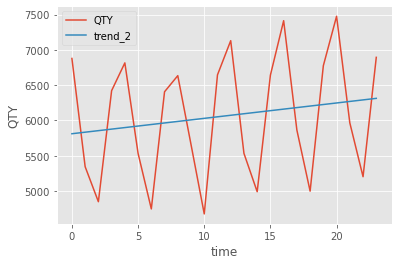

In [33]:
# 回归直线趋势法：分解趋势信息
time_index_list = ['1991Q1','1991Q2','1991Q3','1991Q4',
                   '1992Q1','1992Q2','1992Q3','1992Q4',
                   '1993Q1','1993Q2','1993Q3','1993Q4',
                   '1994Q1','1994Q2','1994Q3','1994Q4',
                   '1995Q1','1995Q2','1995Q3','1995Q4',
                   '1996Q1','1996Q2','1996Q3','1996Q4']
QTY_list = [6878.4,5343.7,4847.9,6421.9,
            6815.4,5532.6,4745.6,6406.2,
            6634.4,5658.5,4674.8,6645.5,
            7130.2,5532.6,4989.6,6642.3,
            7413.5,5863.1,4997.4,6776.1,
            7476.5,5965.5,5202.1,6894.1]

t_list = np.arange(len(time_index_list))+1
data = pd.DataFrame({'Year':time_index_list,
                     'QTY':QTY_list,
                     't':t_list})

from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(data[['t']],data['QTY'])
b0,b1 = lr.intercept_,lr.coef_[0]   # 返回模型的常数项与参数估计值
print("趋势项的回归曲线为：y_hat = "+str(b0)+ " + " + str(b1) + " * t" )
t_2 = lr.predict(data[['t']])   #返回趋势项的预测值
data['trend_2'] = t_2
data[['QTY','trend_2']].plot()
plt.xlabel("time")
plt.ylabel("QTY")
plt.show()

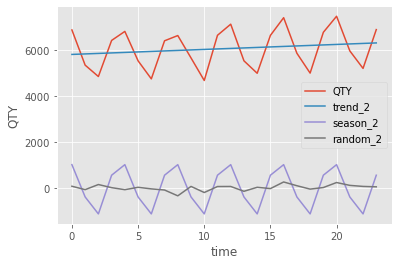

In [34]:
# 回归直线趋势法：分解季节项和随机项
season_2 = [1004.4,-404.3,-1144.1,544.0]
season_2 = season_2 * 6   # 6年
data['season_2'] = season_2
data['random_2'] = data['QTY'] - data['trend_2'] - data['season_2']
data[['QTY','trend_2','season_2','random_2']].plot()
plt.xlabel("time")
plt.ylabel("QTY")
plt.show()

- 方法3：二次曲线拟合

除了使用线性方程对数据的趋势项进行描述，当我们发现数据中的趋势有明显的非线性关系的时候，也可以使用非线性方程对数据的趋势项进行描述，最简单的非线性函数就是二次函数！这时，假设时间序列数据的趋势项满足二元线性回归模型，即：

$$
x_{t}=\beta_0 +\beta_1 t+\beta_2 t^{2}+\varepsilon_{c}, \quad t=1,2, \cdots
$$

趋势项的回归曲线为：y_hat = 5934.407262845851 + -11.632987078139355 * t + 1.3371473092125317t^2


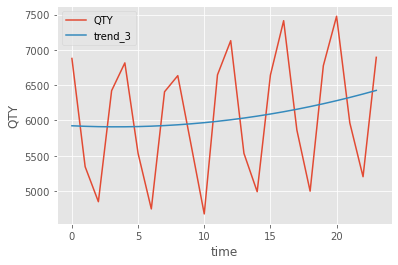

In [35]:
# 二次曲线拟合趋势法：分解趋势信息
time_index_list = ['1991Q1','1991Q2','1991Q3','1991Q4',
                   '1992Q1','1992Q2','1992Q3','1992Q4',
                   '1993Q1','1993Q2','1993Q3','1993Q4',
                   '1994Q1','1994Q2','1994Q3','1994Q4',
                   '1995Q1','1995Q2','1995Q3','1995Q4',
                   '1996Q1','1996Q2','1996Q3','1996Q4']
QTY_list = [6878.4,5343.7,4847.9,6421.9,
            6815.4,5532.6,4745.6,6406.2,
            6634.4,5658.5,4674.8,6645.5,
            7130.2,5532.6,4989.6,6642.3,
            7413.5,5863.1,4997.4,6776.1,
            7476.5,5965.5,5202.1,6894.1]

t_list = np.arange(len(time_index_list))+1
data = pd.DataFrame({'Year':time_index_list,
                     'QTY':QTY_list,
                     't':t_list})
data['t_square'] = data['t']**2
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(data[['t','t_square']],data['QTY'])
b0,b1 = lr.intercept_,lr.coef_   # 返回模型的常数项与参数估计值
print("趋势项的回归曲线为：y_hat = "+str(b0)+ " + " + str(b1[0]) + " * t" + " + " + str(b1[1]) + "t^2" )
t_3 = lr.predict(data[['t','t_square']])   #返回趋势项的预测值
data['trend_3'] = t_3
data[['QTY','trend_3']].plot()
plt.xlabel("time")
plt.ylabel("QTY")
plt.show()

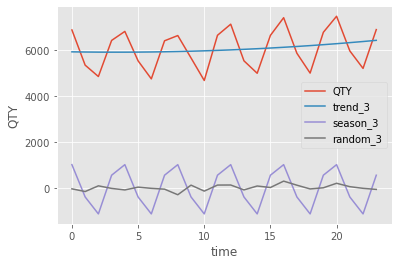

In [36]:
# 二次曲线拟合趋势法：分解季节项和随机项
season_3 = [1004.4,-404.3,-1144.1,544.0]
season_3 = season_3 * 6   # 6年
data['season_3'] = season_3
data['random_3'] = data['QTY'] - data['trend_3'] - data['season_3']
data[['QTY','trend_3','season_3','random_3']].plot()
plt.xlabel("time")
plt.ylabel("QTY")
plt.show()

- **方法4：经典分解法**

以上的篇幅介绍的都是按照加法模型的原理一步步推导然后自己写python代码实现的，但是在statsmodel中已经有关于经典分解法的具体实现，这个命令就是**seasonal_decompose** 函数，这个函数能帮我们自动完成时间序列的分解，无需自己使用python编写具体的分解算法。我们先介绍这个函数的相关使用，然后再来看看这个函数具体的实现细节！在这个案例中，我们使用co2数据集进行分析，这个数据集是statsmodel内置的时间序列数据集，我们对这个数据集进行时间序列的分解。

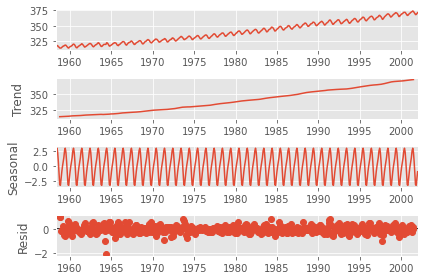

In [42]:
# 使用官方示例的co2数据集展示seasonal_decompose分解
from statsmodels.datasets import co2  # 引入co2数据集
from statsmodels.tsa.seasonal import seasonal_decompose
data = co2.load().data
data = data.resample('M').mean().ffill()   # 将数据按月重采样得到新的数据
result = seasonal_decompose(data, model='additive')   # 当model='multiplicative'时是乘法模型的分解（下面内容即将介绍）
result.plot()
plt.show()


In [43]:
# 如何提取序列的趋势项、季节项和随机项
trend = result.trend   ## 模型的趋势项
seasonal = result.seasonal   ## 模型的季节项
resid = result.resid   ## 模型的随机项

那这个传统的**seasonal_decompose** 函数的原理是什么呢？其实与前面的经典算法大同小异，只是在具体的趋势项、季节项等计算上有少许差异。

（1）分解趋势项：中心化移动均值

什么是中心化移动均值？想象一下当我们希望计算t时刻的序列值$X_t$的趋势项的值时，一个很自然的想法就是使用t时刻前后的h个时点的序列值的平均值近似估算$X_t$的趋势项的值，即：
$$
T_t = \frac{X_{t-h}+X_{t-h+1}+...+X_t+...+X_{t+h-1}+X_{t+h}}{2h+1}
$$
在这里，我们不去追究t的奇偶性的问题，因为不同的奇偶性会导致上述公式有少许不同。至此，我们可以通过以上公式估算t时刻的序列值$X_t$的趋势项$T_t$。

（2）分解季节项：（与前面的几个经典算法保持一致）

采用将原始时间序列减去趋势项：
$$
S_{t}=X_{t}-T_{t}
$$

然后，将各个周期内相同频率下的值平均化, 得到季节项$S_t$ 。

（3）分解随机项：$R_t = X_t - T_t - S_t,\quad t=1,2,3....$

- **方法5：STL分解**

以上的时间序列的分解方法都是基于趋势项服从某个简单形式的基础上得到的，比如使趋势满足线性回归的回归直线趋势法、使趋势满足二次曲线回归的二次曲线拟合法等等，这些假设使得时间序列的分解方法无法处理任意形式的季节性。下面介绍的STL分解全称是Seasonal and Trend Decomposition by Loess，其中Loess是一种基于局部多项式拟合的非参数回归方法。这种STL分解方法不但可以处理任意形式的季节性，而且季节成分可以随时间改变，变化的速率受我们自己控制，趋势成分的复杂程度也受到我们自身控制。但是这种方法也只能处理加法模型，即：$X_t = T_t + S_t + R_t, t = 1,2,......   $，不能处理**乘法模型**（稍后介绍）。

<Figure size 864x576 with 0 Axes>

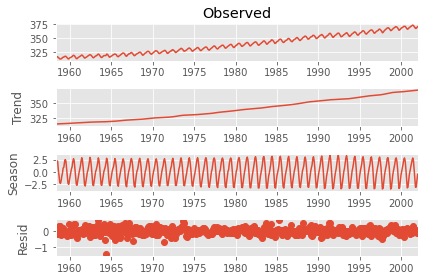

In [38]:
# 使用官方示例的co2数据集展示STL分解
from statsmodels.datasets import co2  # 引入co2数据集
from statsmodels.tsa.seasonal import STL   ## 引入STL方法

data = co2.load().data
data = data.resample('M').mean().ffill()   # 将数据按月重采样得到新的数据
res = STL(data).fit()
plt.figure(figsize=(12,8))
res.plot()
plt.show()

STL分解如何作用于乘法模型呢？什么是乘法模型呢？首先，我们先来学习什么是乘法模型：假设时间序列可以分解为趋势项、季节项和随机项，但是他们之间的关系是乘法关系，这就是乘法模型。

$$
X_{t}=T_{t} \cdot S_{t} \cdot I_{t} \quad t = 1,2,......
$$

STL分解是无法直接作用于乘法模型的，但是乘法模型可以稍作转换变成加法模型，如：

$$
\begin{gathered}
\log \left(X_{t}\right)=\log \left(\operatorname{T}_{t} \times \text { S }_{t} \times \operatorname{R}_{t}\right)=\log \left(\operatorname{T}_{t}\right)+\log \left(\text { S }_{t}\right) 
+\log \left(\text { R }_{t}\right)
\end{gathered}
$$

也就是说，可以先将数据取对数，进行STL分解后的各分量结果取指数即可。

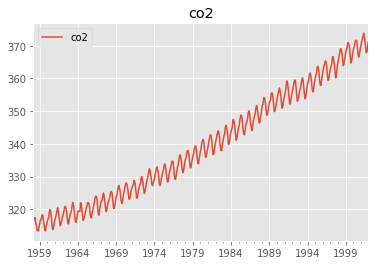

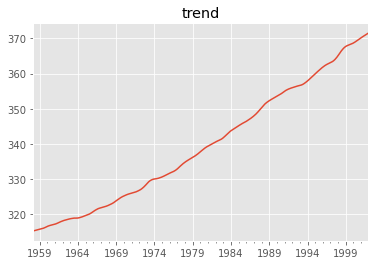

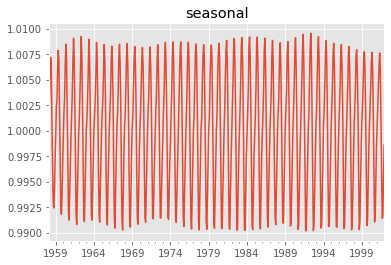

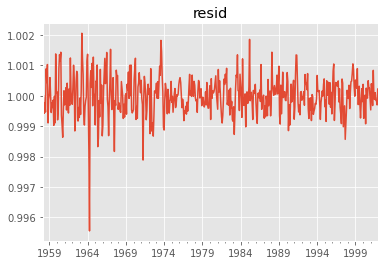

In [39]:
# 使用官方示例的co2数据集展示STL分解(乘法模型)
from statsmodels.datasets import co2  # 引入co2数据集
from statsmodels.tsa.seasonal import STL   ## 引入STL方法

data = co2.load().data
data = data.resample('M').mean().ffill()   # 将数据按月重采样得到新的数据

data = np.log(data)   ## 对数据取对数实现乘法模型转化为假发模型
res = STL(data).fit()
trend = np.exp(res.trend)   ## 乘法模型的趋势项
seasonal = np.exp(res.seasonal)   ## 乘法模型的季节项
resid = np.exp(res.resid)   ## 乘法模型的随机项
data = np.exp(data)  ## 还原数据项

data.plot()
plt.title("co2")
plt.show()

trend.plot()
plt.title("trend")
plt.show()

seasonal.plot()
plt.title("seasonal")
plt.show()

resid.plot()
plt.title("resid")
plt.show()

**（2）预测:** 时间序列的预测目标是我们普遍关心的目标，也是大多数想研究时间序列分析的目的，也是我们后面章节的主要内容。什么是预测？顾名思义预测就是给定以前的历史数据，预测今天乃至未来的数据。时间序列的预测方法很多，我们将在后续章节一一详细学习，包括：
   - 简单移动平均预测以及加权移动平均预测
   - 指数平滑模型
   - 线性预测模型之ARIMA模型与SARIMA模型
   - 基于多变量时间序列的SARIMAX模型、VAR模型与XGBoost（重点介绍）
   - 基于深度学习的时间序列模型基础：RNN与LSTM
   - 时间序列模型的特征工程及框架Tsfresh（TimeSeries Fresh）
   - 工程与比赛常用模型及框架简介：FB-Prophet（重点介绍）、AutoTS（重点介绍）、DeepAR等等。

接下来的内容，我们将对预测模型做一个总结以及相关算法的简单介绍，并使用python建立预测模型中最简单的移动平均模型和指数平滑模型来解决实际问题。

**（2.1） 时间序列预测的归纳总结：**

   - 按照变量的多少划分：单变量时间序列与多变量时间序列
  
   时间序列这个名词大家很好理解，可是单变量和多变量是什么呢？这里的变量是指自变量，时间序列中自变量天然存在一个，那就是时间。这个概念类似于简单线性回归和多元线性回归的区别，单变量指的是我们的自变量中只有时间维度的一个维度值，多变量指的是数据中除了天然存在的时间维度外，还有其他时间外的自变量因素。给大家画个图就很好理解了。

   <div>
   <img src="./images/1_2.png" width="600"/>
   </div>

   解决单变量时间序列问题的常用模型有：ARIMA模型、Prophet模型等等；常见的解决多变量时间序列问题的常见模型有：SARIMAX模型、VAR模型与XGBoost模型（用的最多）。

   - 按照预测目标的多少划分：单目标时间序列和多目标时间序列

   - 按照预测任务划分：回归、分类、聚类

<div>
<img src="./images/1_1.png" width="600"/>
</div>


